#Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Display data

In [2]:
df = pd.read_csv("Crop_recommendation.csv")  # Update with your file name if different

# Display basic info
print(df.head())
print(df.info())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


## Encode categorical labels

In [3]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

## Define features and target variable

In [4]:
X = df.drop(columns=['label'])
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Hyperparameter tuning (Optional but improves accuracy)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid, cv=5, n_jobs=-1, verbose=1)

In [6]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [7]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


## Train the model with best parameters

In [8]:
model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Prediction: ", y_pred);
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Prediction:  [15 21 17 17  0 12  0 13 14 10  2  4 19  8  4 19  0 11 17 15  5 17 16 17
  3  8 14 16 18 20 19 13  8 10  8  2  8  3  3  9 17 12  2 11 14 11 18  4
 15 11  2  5  7 14  5  9  6  0  1  2 21  4 10 16 17  2 16 20 15 18 15  4
  8  1  2 17  1  6 21 16  5  3 20 13 16 12  5 13  2 19 11 13  6 17 18 13
  9  5  2 10  4 20 16 15 21  9 21  1 18 13  1  8  6 19 18  3 11  4 19 20
 18  7  2  4  3  2  4 11  1 13  1  9 19  3  4 16 18  1  1  0  9 15 14 13
  4 11  0  4  9 13 14 10 21 14 18 18 18  9 11  8  3  0 16  6 20  4  7 10
 21  7  7  2 19  3  4 11 10  7 21  8  5  5  9  8 13  9  1  9  4 17 17 14
 12 19 21  9 11  0  2  3  7  7  1  6 20 19 14  1  8 14 11  3  3  3  0 20
  9 17  5  2  9 12 12  4 17  0  3 19  3 15  0 15 15 12 12  6  4 19 20 15
  5 17 13 11 12 15 12 14  5  7  4  6 18 20  0 19  5  3  6  8 12  1 17  0
  3 20 18 13 14  8 19  7 13  8  6  4 11  3  1  8  4  8 12 15  0  1 18  2
 16  3 21  1  0  3  5 18 16  0  4 17 21 13 17  3 19  3 17 10  0 19  3 12
  3 19 21  9 14 15 21  9 15 12 20  2  

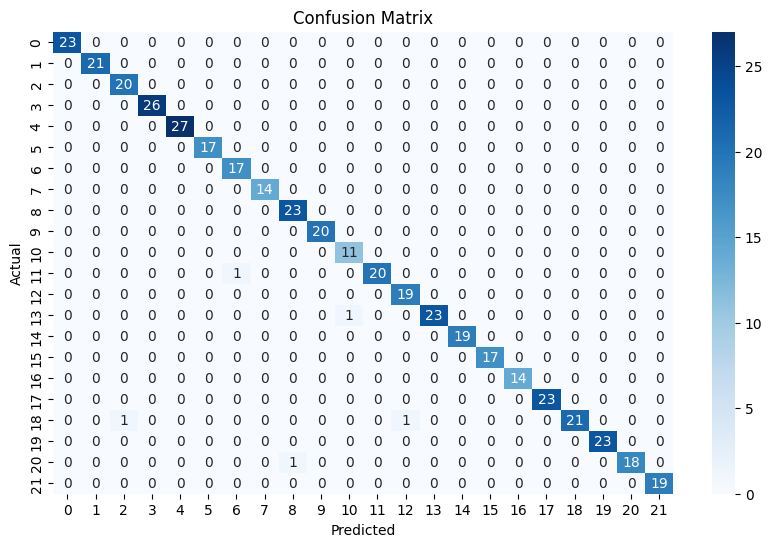

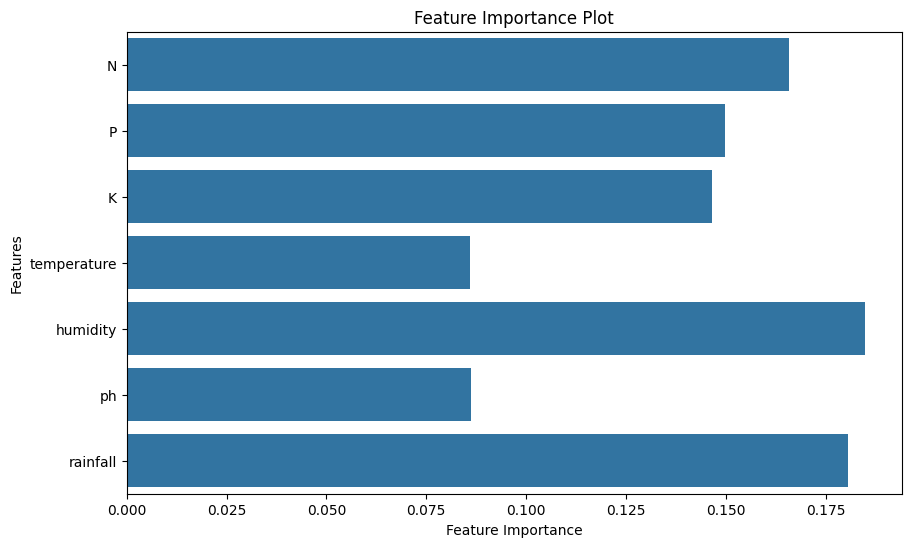

In [11]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

In [19]:
y_pred = model.predict(np.array([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]]))
y_pred_labels = label_encoder.inverse_transform(y_pred)[0]
print(y_pred_labels)

rice


In [20]:
import joblib

# Save the trained model
joblib.dump(model, "xgboost_crop_recommendation.pkl")

['xgboost_crop_recommendation.pkl']